<a href="https://colab.research.google.com/github/jtndr26/EV_Segmentation/blob/main/EV_Market_Segmentation_Geographic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EV Segmentation w.r.t. Geography

---
Contributor : Jeetendra Sarpe


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
path = "/content/drive/My Drive/Feynn_Labs/EV_Market_Segmentation/EV_Geographic/"
sale = pd.read_csv(path+'Statewise sales.csv')
chrg1 = pd.read_csv(path+'Statewise Charging Stations.csv')
exp = pd.read_csv(path+'Charging Stations ExpWay.csv', encoding="ISO-8859-1")
chrg2 = pd.read_csv(path+'Statewise Charging Stations at  Fuel Stations.csv')

In [5]:
sale.head()

,Sl. No.,State/UT,Total Number of Invoice/Sales
0,1,Jammu Kashmir,437
1,2,Himachal Pradesh,241
2,3,Punjab,764
3,4,Chandigarh,48
4,5,Uttarakhand,1057


In [6]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sl. No.                        37 non-null     object
 1   State/UT                       37 non-null     object
 2   Total Number of Invoice/Sales  37 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1016.0+ bytes


In [7]:
sale.describe()

,Total Number of Invoice/Sales
count,37.000000
mean,4738.324324
std,14599.856236
min,0.000000
25%,48.000000
50%,771.000000
75%,2953.000000
max,87659.000000


In [8]:
sale['State/UT'].unique()

array(['Jammu Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chhattisgarh', 'Madhya Pradesh', 'Gujarat',
       'Maharashtra', 'Andhra Pradesh', 'Karnataka', 'Goa', 'Lakshadweep',
       'Kerala', 'Tamilnadu', 'Puducherry', 'Andaman and Nicobar Islands',
       'Telangana', 'Ladakh',
       'The Dadra and Nagar Haveli and Daman and Diu', 'Total'],
      dtype=object)

In [9]:
chrg1.head()

,State/UT,No. of Electric Vehicle (EV) Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [10]:
chrg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   State/UT                                          26 non-null     object
 1   No. of Electric Vehicle (EV) Chargers Sanctioned  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes


In [11]:
chrg1['State/UT'].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Tamil Nadu', 'Gujarat',
       'Uttar Pradesh', 'Rajasthan', 'Karnataka', 'Madhya Pradesh',
       'West Bengal', 'Telangana', 'Kerala', 'Delhi', 'Chandigarh',
       'Haryana', 'Meghalaya', 'Bihar', 'Sikkim', 'Jammu and Kashmir',
       'Chhattisgarh', 'Assam', 'Odisha', 'Uttarakhand', 'Puducherry',
       'Andaman and Nicobar (Port Blair)', 'Himachal Pradesh', 'Total'],
      dtype=object)

In [12]:
chrg2.head()

,State/UT,No of RO's where EV Charging Facility available
0,Andaman & Nicobar,2
1,Andhra Pradesh,191
2,Arunachal Pradesh,9
3,Assam,61
4,Bihar,87


In [13]:
chrg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   State/UT                                         34 non-null     object
 1   No of RO's where EV Charging Facility available  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


In [14]:
chrg2['State/UT'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Nagaland', 'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Tripura',
       'Dadra and Nagar Haveli and Daman and Diu', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Grand Total'], dtype=object)

In [15]:
exp.head()

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30


In [16]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sl. No                           26 non-null     object
 1   Category                         26 non-null     object
 2   Expressways/Highways             26 non-null     object
 3   EV Charging Stations Sanctioned  26 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 960.0+ bytes


In [17]:
sale = sale.iloc[:-1,:]
chrg1 = chrg1.iloc[:-1,:]
chrg2 = chrg2.iloc[:-1,:]
exp = exp.iloc[:-1,1:]

In [18]:
sale.tail()

,Sl. No.,State/UT,Total Number of Invoice/Sales
31,32,Puducherry,138
32,33,Andaman and Nicobar Islands,2
33,34,Telangana,3031
34,35,Ladakh,0
35,36,The Dadra and Nagar Haveli and Daman and Diu,27


## EDA

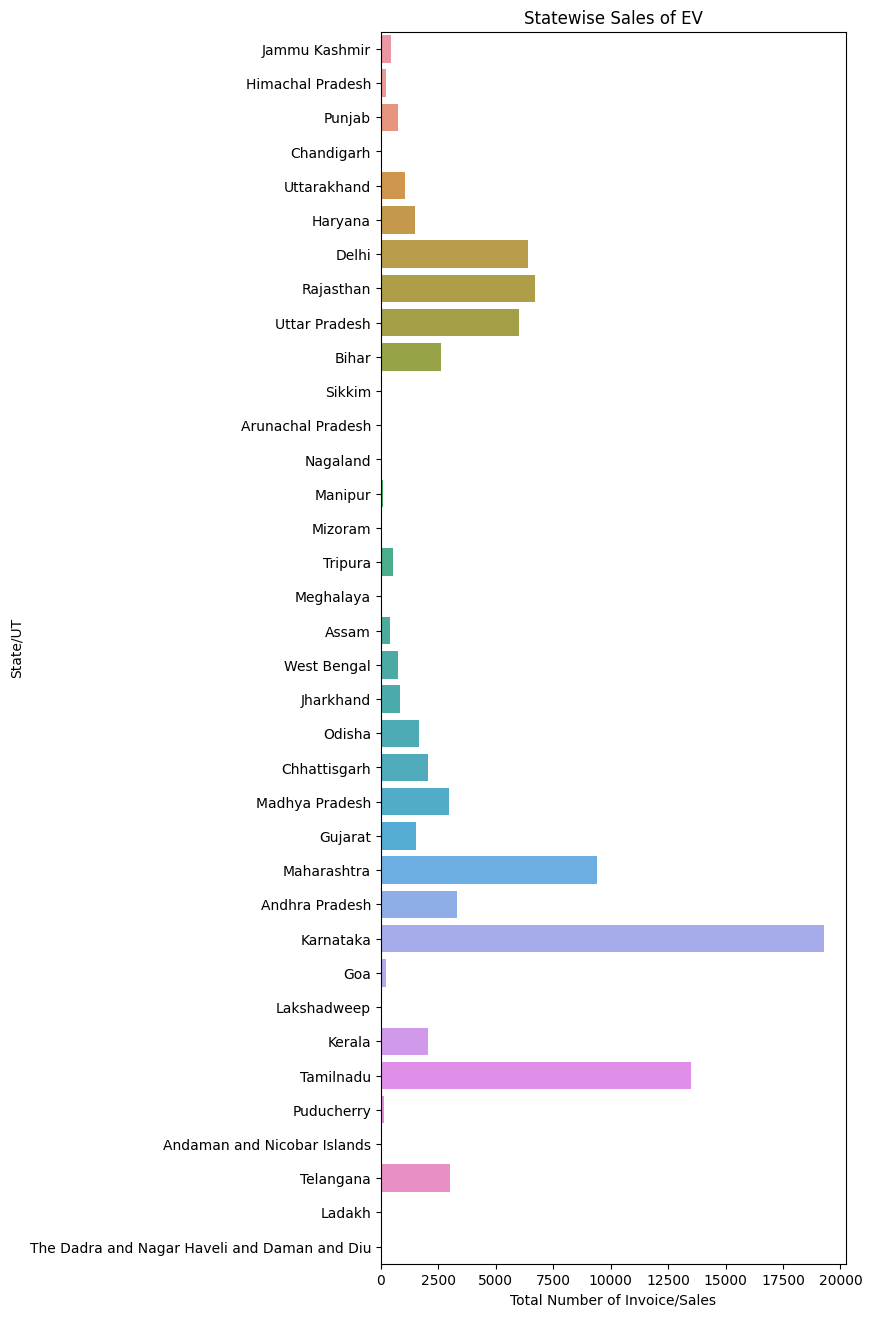

In [19]:
plt.figure(figsize = (6,16))
sns.barplot(data = sale,y = 'State/UT',x = 'Total Number of Invoice/Sales')
# plt.xticks(rotation ='vertical')
plt.title('Statewise Sales of EV')
plt.show()

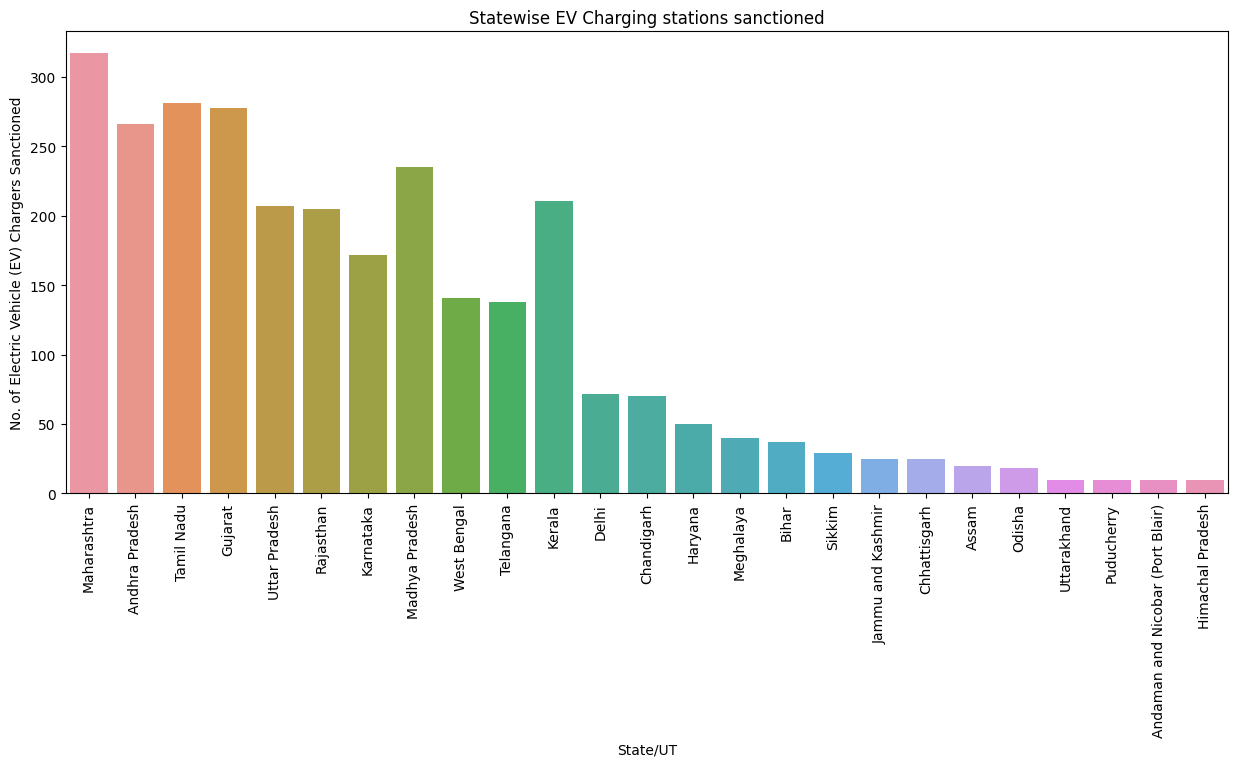

In [20]:
plt.figure(figsize = (15,6))
sns.barplot(data = chrg1,x = 'State/UT',y = 'No. of Electric Vehicle (EV) Chargers Sanctioned' )
plt.xticks(rotation = 'vertical')
plt.title('Statewise EV Charging stations sanctioned')
plt.show()

In [21]:
chrg2.head()

,State/UT,No of RO's where EV Charging Facility available
0,Andaman & Nicobar,2
1,Andhra Pradesh,191
2,Arunachal Pradesh,9
3,Assam,61
4,Bihar,87


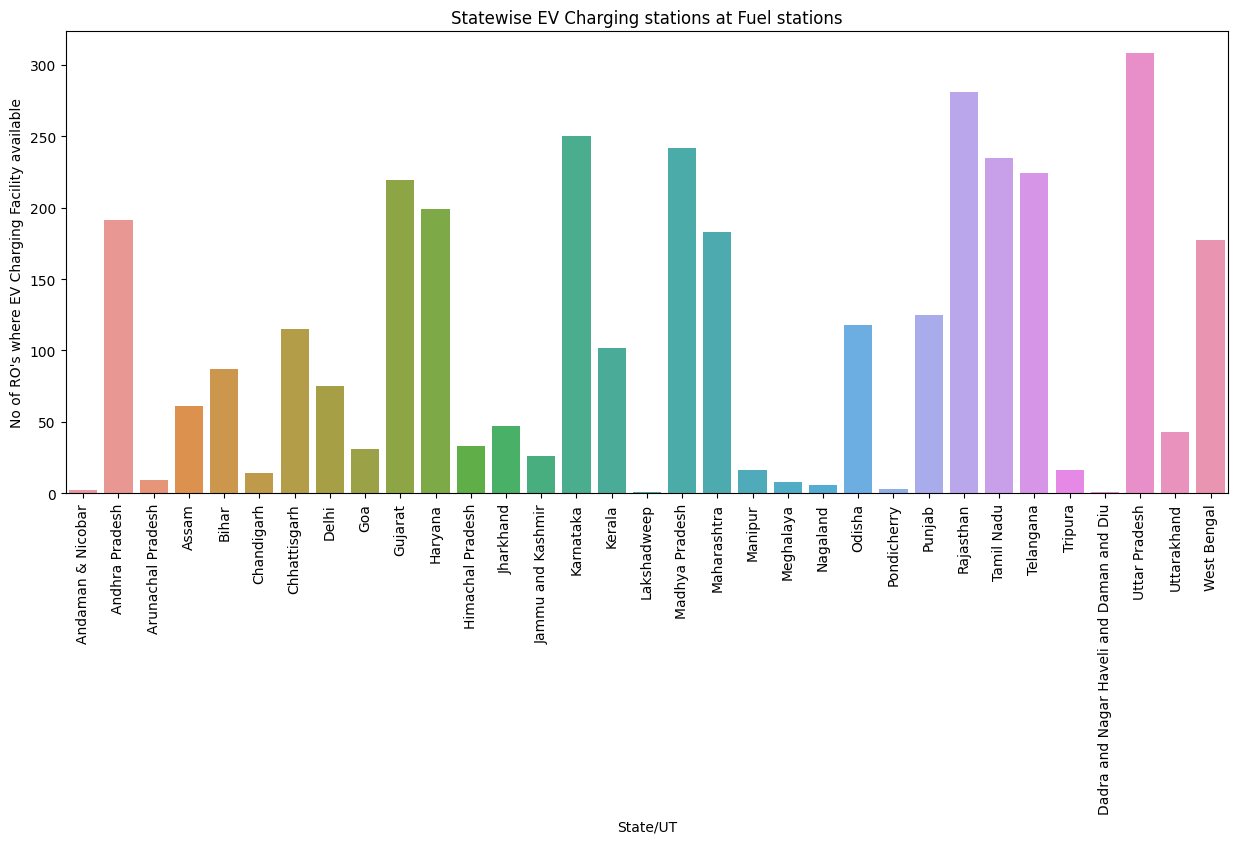

In [22]:
plt.figure(figsize = (15,6))
sns.barplot(data = chrg2,x = 'State/UT',y = "No of RO's where EV Charging Facility available" )
plt.xticks(rotation = 'vertical')
plt.title('Statewise EV Charging stations at Fuel stations')
plt.show()

In [23]:
exp

,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,Expressways,Mumbai - Pune,10
1,Expressways,Ahmadabad - Vadodara,10
2,Expressways,Delhi Agra Yamuna,20
3,Expressways,Bengaluru Mysore,14
4,Expressways,Bangaluru-Chennai,30
5,Expressways,Surat-Mumbai,30
6,Expressways,Agra-Lucknow,40
7,Expressways,Eastern Peripheral (A),14
8,Expressways,Hyderabad ORR,16
9,Highways,Delhi - Srinagar,80


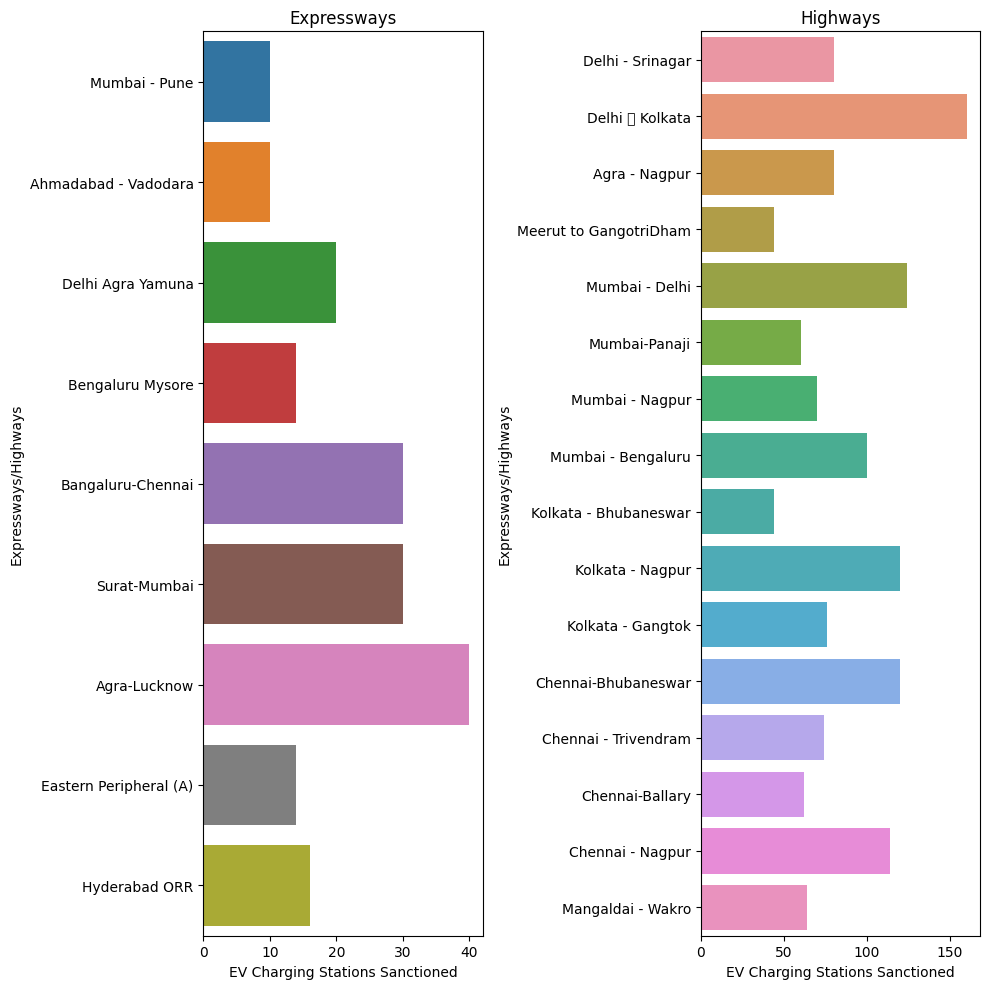

In [24]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.barplot(data = exp[exp['Category'] == 'Expressways'],y = 'Expressways/Highways',x = 'EV Charging Stations Sanctioned')
plt.title('Expressways')
plt.subplot(1,2,2)
sns.barplot(data = exp[exp['Category'] == 'Highways'],y = 'Expressways/Highways',x = 'EV Charging Stations Sanctioned')
plt.title('Highways')
plt.tight_layout()
plt.show()